<a href="https://colab.research.google.com/github/rowenhama/Tesla-Stock-Price-Prediction/blob/main/Tesla_Stock_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing dependencies
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [23]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving Tesla.csv.csv to Tesla.csv.csv


In [24]:
#store the data into a data frame
df = pd.read_csv('Tesla.csv.csv')
df.head(7)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
6,7/8/2010,16.139999,17.520000,15.570000,17.459999,7711400,17.459999


In [25]:
#get the number of trading days
df.shape

(1692, 7)

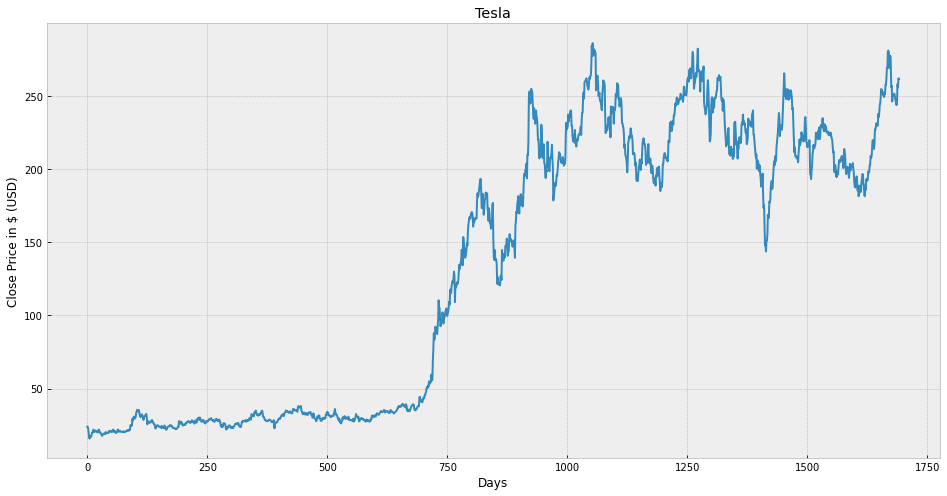

In [26]:
#visualise close price data
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close Price in $ (USD)')
#plt.axis([0, 50, 0, 20])
plt.plot(df['Close'])
plt.show()

In [28]:
#getting close price only
df = df[['Close']]
df.head(7)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001
5,15.800000
6,17.459999


In [30]:
#create a variable to predict 'x' days out in the future
future_days = 25
#new column (target data)
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(7)

,Close,Prediction
1685,244.899994,NaN
1686,243.690002,NaN
1687,246.169998,NaN
1688,258.000000,NaN
1689,255.729996,NaN
1690,262.049988,NaN
1691,261.500000,NaN


In [ ]:
#Create the feature dataset 'X' and convert it to a numpy array and remove the last 'x' rows/days
